129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Error cuadrático medio (Keras): 56152530944.0
Error cuadrático medio (scikit-learn): 4927191040.0


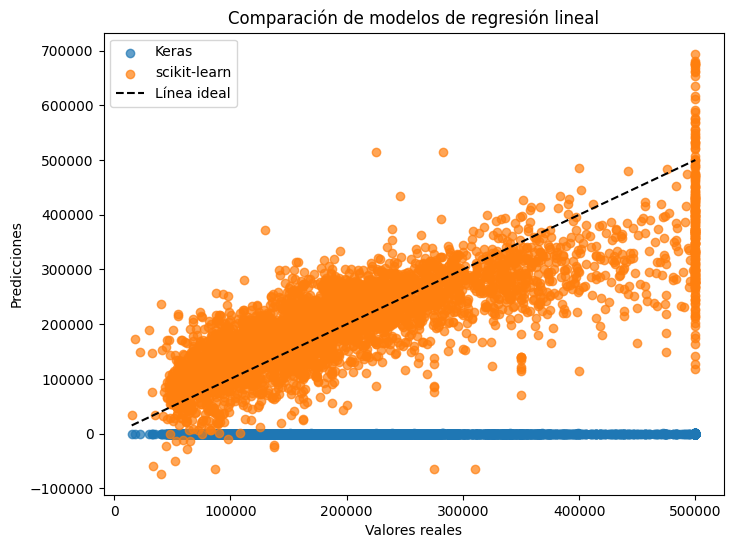

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

# 1. Carga el dataset.
# Puedes usar el dataset 'California Housing' que viene con Keras:
(x_train, y_train), (x_test, y_test) = keras.datasets.california_housing.load_data()

# 2. Prepara los datos.
# Normaliza los datos para mejorar el rendimiento del modelo:
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
x_test = (x_test - x_test.mean(axis=0)) / x_test.std(axis=0)


# 3. Crea el modelo de regresión lineal con Keras.
model_keras = keras.Sequential([
    keras.layers.Dense(1, input_shape=(x_train.shape[1],))
])
model_keras.compile(optimizer='adam', loss='mse')

# 4. Entrena el modelo de Keras.
model_keras.fit(x_train, y_train, epochs=100, verbose=0)

# 5. Crea el modelo de regresión lineal con ML pregressor (scikit-learn).
model_sklearn = LinearRegression()

# 6. Entrena el modelo de scikit-learn.
model_sklearn.fit(x_train, y_train)

# 7. Evalúa los modelos.
y_pred_keras = model_keras.predict(x_test)
y_pred_sklearn = model_sklearn.predict(x_test)

mse_keras = mean_squared_error(y_test, y_pred_keras)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print(f"Error cuadrático medio (Keras): {mse_keras}")
print(f"Error cuadrático medio (scikit-learn): {mse_sklearn}")

# 9. Imprimir la gráfica.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_keras, label='Keras', alpha=0.7)
plt.scatter(y_test, y_pred_sklearn, label='scikit-learn', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Línea ideal')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de modelos de regresión lineal')
plt.legend()
plt.show()